### Decision Tree (CART Algorithm)

### Imports

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Formulating Dataset
- Titanic survior (Dataset source - Kaggle)

In [163]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
y_train = df[df.columns[1:2]]
x_train = df[['Pclass','Sex','Age','Parch','Fare']]

In [165]:
print(y_train.head())
print(x_train.head())

   Survived
0         0
1         1
2         1
3         1
4         0
   Pclass     Sex   Age  Parch     Fare
0       3    male  22.0      0   7.2500
1       1  female  38.0      0  71.2833
2       3  female  26.0      0   7.9250
3       1  female  35.0      0  53.1000
4       3    male  35.0      0   8.0500


In [166]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [167]:
x_train["Sex"] = le.fit_transform(x_train["Sex"])
print(x_train.head())

   Pclass  Sex   Age  Parch     Fare
0       3    1  22.0      0   7.2500
1       1    0  38.0      0  71.2833
2       3    0  26.0      0   7.9250
3       1    0  35.0      0  53.1000
4       3    1  35.0      0   8.0500


<ipython-input-167-30c6641e5f83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["Sex"] = le.fit_transform(x_train["Sex"])


### Analysing Dataset

In [168]:
plt.style.use('seaborn')
df = x_train
df.insert(len(x_train.columns),"Survived",y_train,True)
df.head()

,Pclass,Sex,Age,Parch,Fare,Survived
0,3,1,22.0,0,7.2500,0
1,1,0,38.0,0,71.2833,1
2,3,0,26.0,0,7.9250,1
3,1,0,35.0,0,53.1000,1
4,3,1,35.0,0,8.0500,0


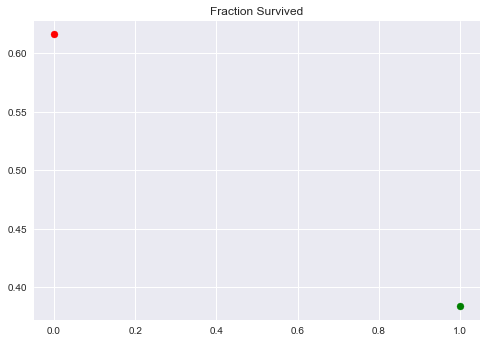

In [169]:
plt.title('Fraction Survived')
plt.scatter(1,df.loc[df['Survived'] == 1].shape[0] / df.shape[0], color = 'green')
plt.scatter(0,df.loc[df['Survived'] == 0].shape[0] / df.shape[0], color = 'red')
plt.show()

#### Passanger Class

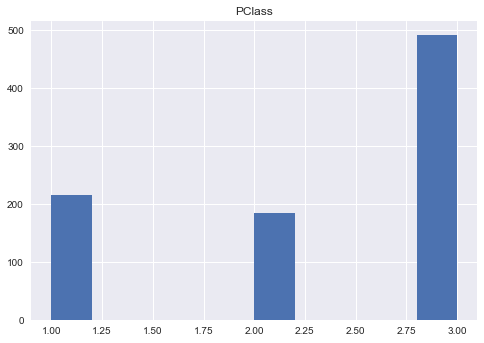

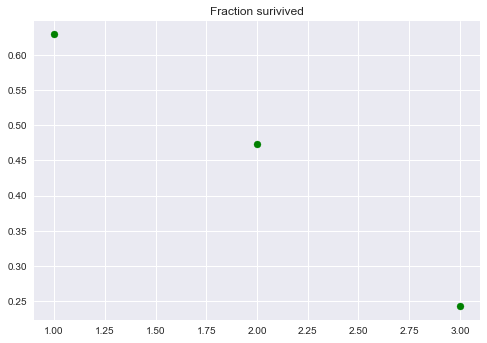

In [170]:
plt.title('PClass')
plt.hist(x_train["Pclass"])
plt.show()

plt.title("Fraction surivived")
for i in range(1,4):
    temp = df.loc[df["Pclass"] == i]
    tot = temp.shape[0]
    temp = temp.loc[temp["Survived"] == 1]
    try: frac = temp.shape[0]/tot
    except: frac = 0
    plt.scatter(i,frac,color = 'green')
plt.show()

#### Sex

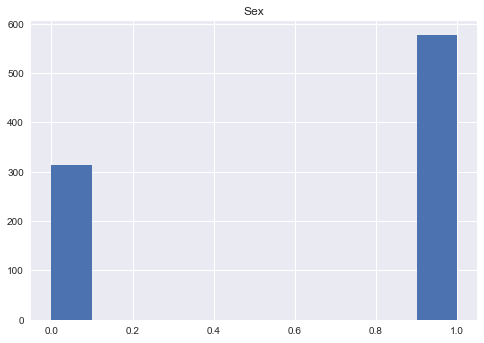

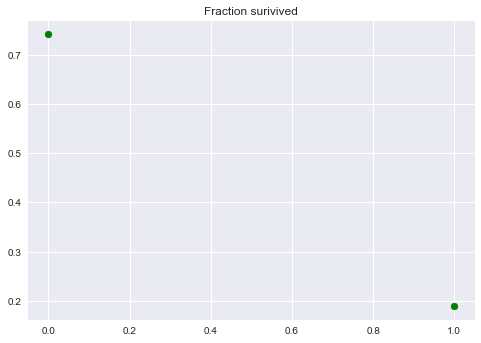

In [171]:
plt.title("Sex")
plt.hist(x_train["Sex"])
plt.show()

plt.title("Fraction surivived")
for i in range(0,2):
    temp = df.loc[df["Sex"] == i]
    tot = temp.shape[0]
    temp = temp.loc[temp["Survived"] == 1]
    try: frac = temp.shape[0]/tot
    except: frac = 0
    plt.scatter(i,frac, color = 'green')
plt.show()

#### Age

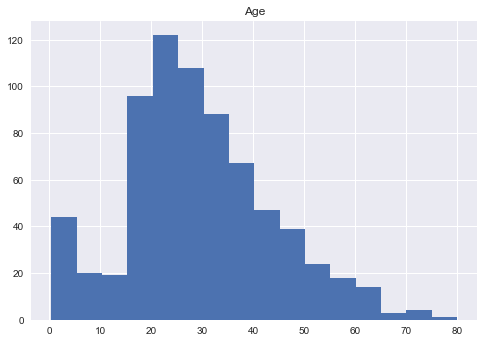

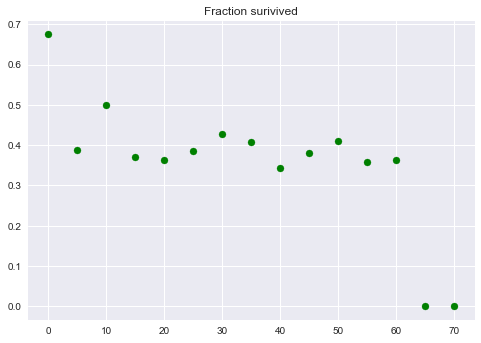

In [172]:
plt.title("Age")
plt.hist(x_train['Age'], bins = 16)
plt.show()

plt.title("Fraction surivived")
for i in range(0,80,5):
    temp = df.loc[df["Age"] < 5+i]
    temp = temp.loc[temp["Age"] > i]
    tot = temp.shape[0]
    temp = temp.loc[temp["Survived"] == 1]
    try: 
        frac = temp.shape[0]/tot
        plt.scatter(i,frac, color = "Green")
    except: pass
plt.show()

#### Parent/Children

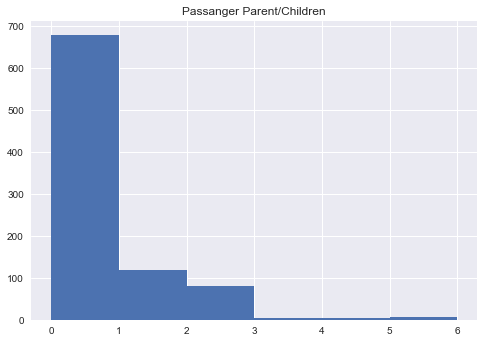

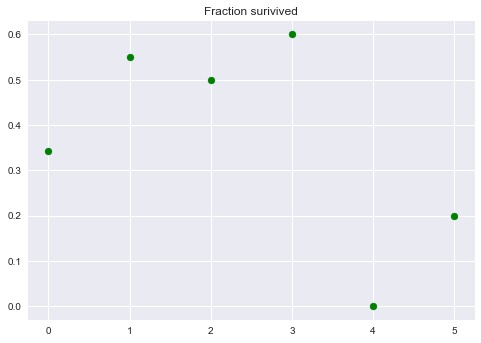

In [173]:
plt.title("Passanger Parent/Children")
plt.hist(x_train["Parch"], bins = 6)
plt.show()

plt.title("Fraction surivived")
for i in range(0,6,1):
    temp = df.loc[df["Parch"] == i]
    tot = temp.shape[0]
    temp = temp.loc[temp["Survived"] == 1]
    cnt = temp.shape[0]
    plt.scatter(i, cnt/tot, color = "green")

#### Fare

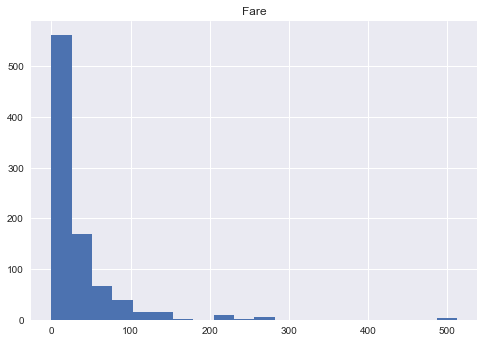

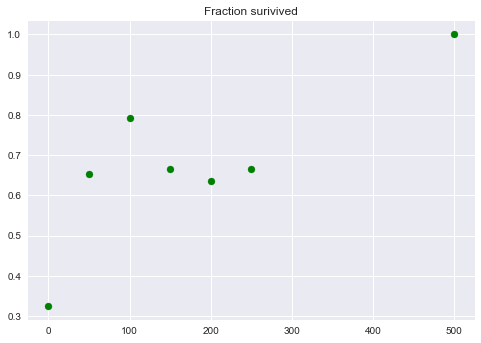

In [174]:
plt.title("Fare")
plt.hist(x_train["Fare"], bins = 20)
plt.show()

plt.title("Fraction surivived")
for i in range(0,550,50):
    temp = df.loc[df["Fare"] > i]
    temp = temp.loc[temp["Fare"] < i + 50]
    tot = temp.shape[0]
    temp = temp.loc[temp["Survived"] == 1]
    try: 
        frac = temp.shape[0]/tot
        plt.scatter(i,frac, color = "green")
    except: pass
plt.show()

###  Decision Tree

#### Tree Construction

In [258]:
# Node of Tree
class Node:
    def __init__(self):
        self.feature = None
        self.left = None
        self.right = None
        self.prection = False

In [257]:
# Decision Tree 
class DecisionTree:
    def __init__(self):
        self.root = Node()
        
    # Splitting dataframe in accordance with feature constraints
    def split_node(self, df, feature):
        if(feature == 'Pclass'):
            df_left = df.loc[df[feature] == 1]
            df_right = df.loc[df[feature] != 1]
            return df_left, df_right
        if(feature == 'Sex'):
            df_left = df.loc[df[feature] == 0]
            df_right = df.loc[df[feature] == 1]
            return df_left, df_right
        if(feature == 'Age'):
            df_left = df.loc[df[feature] <= 5]
            df_right = df.loc[df[feature] > 5]
            return df_left, df_right
        if(feature == 'Parch'):
            df_left = df.loc[df[feature] == 0]
            df_right = df.loc[df[feature] != 0]
            return df_left, df_right
        if(feature == 'Fare'):
            df_left = df.loc[df[feature] < 50]
            df_right = df.loc[df[feature] >= 50]
            return df_left, df_right
    
    #Gini Impurity computation for a particular feature
    def gini_impurity(self, df, feature):
        lchild, rchild = self.split_node(df,feature)
        try:
            #left child Gini impurity
            lwt = lchild.shape[0]/df.shape[0]
            probab_sur = lchild.loc[lchild['Survived'] == 1].shape[0]/lchild.shape[0]
            probab_die = lchild.loc[lchild['Survived'] == 1].shape[0]/lchild.shape[0]
            left_gini_imp = lwt*(1 - probab_sur**2 - probab_die**2)

            ##right child Gini imppurity
            rwt = rchild.shape[0]/df.shape[0]
            probab_sur = rchild.loc[rchild['Survived'] == 1].shape[0]/rchild.shape[0]
            probab_die = rchild.loc[rchild['Survived'] == 0].shape[0]/rchild.shape[0]
            right_gini_imp = rwt*(1 - probab_sur**2 - probab_die**2)
    
            # Weighted sum of gini impurities from left and right child nodes
            tot_gini_imp = left_gini_imp + right_gini_imp
            return tot_gini_imp
        
        except: return 1
    
    #Maximum gini index for node
    def gini_index(self, df):
        if(df.shape[0] == 0): return 0,None
        
        # Selection of feature with minimum gini impurity
        min_gini_impurity = 1
        min_gi_feature = None
        for feature in df.columns.drop('Survived'):
            gi = self.gini_impurity(df,feature)
            if(gi < min_gini_impurity):
                min_gini_impurity = gi
                min_gi_feature = feature
        
        try:
            #Gini Impurity of current node before split
            probab_sur = df.loc[df['Survived'] == 1].shape[0]/df.shape[0]
            probab_die = df.loc[df['Survived'] == 0].shape[0]/df.shape[0]
            gimp_curr = 1 - probab_sur**2 - probab_die**2
            
            #Gini index for current node split about feature with min gini impurity
            gindex = gimp_curr - min_gini_impurity
            return gindex, min_gi_feature
        
        except: return 0, min_gi_feature
    
    #Building tree
    def build(self,df,node,idx):
        #Corner Cases
        #No entry left in dataframe
        if(df.shape[0] == 0): return node
        #No feature left for splitting
        if(df.shape[1] == 1):
            node.prediction = bool(df.loc[df['Survived'] == 1].shape[0] > df.loc[df['Survived'] == 0].shape[0]) 
            return node
        
        #Defining Node properties
        node.prediction = bool(df.loc[df['Survived'] == 1].shape[0] > df.loc[df['Survived'] == 0].shape[0]) 
        gindex, split_feature = self.gini_index(df)
        node.feature = split_feature
        print(idx,node.feature, gindex, node.prediction)
        
        #Splitting dataframe for child nodes and recursive call for tree building
        if(split_feature):
            df_left, df_right = self.split_node(df,split_feature)
            df_left = df_left[df_left.columns.drop(split_feature)]
            df_right = df_right[df_right.columns.drop(split_feature)]

            if(df_left.columns.shape[0] > 0 and gindex > 0):
                left = Node()
                right = Node()
                node.left = self.build(df_left, left, 2*idx+1)
                node.right = self.build(df_right, right, 2*idx+2)
        return node
    
    # External fn. call for building tree
    def build_tree(self,df,idx):
        self.root = self.build(df,self.root,0)
    
    # Choosing relevant child node in accordance with data entry feature value
    def rel_child(self,val,feature):
        if(feature == 'Pclass'):
            if(val == 1): return 0
            else: return 1
        if(feature == 'Sex'):
            if(val == 0): return 0
            else: return 1
        if(feature == 'Age'):
            if(val <= 5): return 0
            else: return 1
        if(feature == 'Parch'):
            if(val == 0): return 0
            else: return 1
        if(feature == 'Fare'):
            if(val < 50): return 0
            else: return 1
    
    #Tree traversal for a data entry
    def traverse_tree(self,x_test,node,idx):
        if(node.left == None): return node.prediction
        
        feature = node.feature
        dirn = self.rel_child(x_test[feature], feature)
        
        if(dirn == 0): return self.traverse_tree(x_test,node.left, 2*idx+1)
        else: return self.traverse_tree(x_test,node.right, 2*idx+2)
    
    #Prediction for output class
    def predict(self,x_test):
        y_pred = []
        for i in range(x_test.shape[0]):
            pred = self.traverse_tree(x_test.iloc[i],self.root,0)
            y_pred.append(pred)
        return y_pred
            
    # Model accuracy evaluation
    def evaluate(self,x_test, y_test):
        y_pred = self.predict(x_test)
        y_pred = np.array(y_pred)
        y_test = np.array(y_test)
        return np.sum(y_pred == y_test)/y_test.shape[0]

#### Initialising Decision Tree

In [249]:
model = DecisionTree()

#### Building Tree

Root node index -> 0

For parent node 'i'
- Left child node index -> 2*i + 1
- Right child node index -> 2*i + 2

In [250]:
root = model.build_tree(df,0)
# Node format - {Node index, Split Feature, Gini Index, Prediction class}

0 Sex 0.31024279473435623 False
1 Parch 0.3637157791614195 True
3 Pclass 0.35730277169158836 True
7 Fare 0.11235894097222221 True
15 None -0.8024691358024691 True
16 None -1.0 True
8 Age 0.10552268244575924 True
17 None -1.0 True
18 None -0.5555555555555556 True
4 Pclass 0.26407407407407407 True
9 Fare 0.10098765432098765 True
19 None -1.0 True
20 Age 0.02902606310013711 True
10 Age 0.21587394411955835 True
21 None -0.6675900277008311 True
22 Fare 0.1453065134099616 True
2 Age 0.07916969856731451 False
5 Fare 0.24043568277972813 True
11 None -0.528344671201814 True
12 None -1.0 True
6 Pclass -0.02897275239738456 False


#### Testing model performance

In [254]:
df_test = df.sample(frac = 0.2)
x_test = df_test[df_test.columns.drop('Survived')]
y_test = df_test['Survived']

In [255]:
model.evaluate(x_test,y_test)

0.8426966292134831

84.2% Accuracy

#### Analysing Prediction

In [256]:
y_pred = model.predict(x_test)
print(y_pred)

[True, True, True, False, False, False, True, False, False, True, False, False, True, True, True, False, False, False, False, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, True, False, False, False, True, False, True, False, True, True, True, False, True, False, True, True, False, False, False, True, False, False, True, True, False, True, False, False, False, False, True, False, False, False, False, False, True, True, True, False, False, True, False, True, False, False, False, True, True, False, False, True, False, False, True, True, False, True, False, False, True, True, True, True, False, True, False, True, False, True, True, False, True, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, True, False, False, False, False, False, False, False, False, False, True, True, False, True, True, False, False, False, False, False, False, False, Fals